In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [84]:
co_data = pd.read_csv('Dataset/COVID-19-time-series-clean-complete.csv')
co_data.head 

<bound method NDFrame.head of         Unnamed: 0       Date      Country/Region  Confirmed  Deaths  \
0                0  1/22/2020         Afghanistan          0       0   
1                1  1/22/2020             Albania          0       0   
2                2  1/22/2020             Algeria          0       0   
3                3  1/22/2020             Andorra          0       0   
4                4  1/22/2020              Angola          0       0   
...            ...        ...                 ...        ...     ...   
108654      108654   8/6/2021             Vietnam     193381    3016   
108655      108655   8/6/2021  West Bank and Gaza     317703    3611   
108656      108656   8/6/2021               Yemen       7131    1384   
108657      108657   8/6/2021              Zambia     199135    3459   
108658      108658   8/6/2021            Zimbabwe     115445    3805   

        Recovered  Active  New cases  New deaths  New recovered  
0               0       0          0   

In [88]:
co_data['Date'] = pd.to_datetime(co_data['Date'])
# co_data
co_data['DateYearMonth'] = co_data['Date'].map(lambda date: 100*date.year + date.month)
# co_data
co_data_04 = co_data.query("DateYearMonth==202004").reset_index()
co_data_04


,index,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
0,13510,13510,2020-04-01,Afghanistan,197,4,5,188,22,0,0,202004
1,13511,13511,2020-04-01,Albania,259,15,67,177,16,0,15,202004
2,13512,13512,2020-04-01,Algeria,847,58,61,728,131,14,15,202004
3,13513,13513,2020-04-01,Andorra,390,14,10,366,14,2,0,202004
4,13514,13514,2020-04-01,Angola,8,2,1,5,1,0,0,202004
...,...,...,...,...,...,...,...,...,...,...,...,...
5785,19295,19295,2020-04-30,Vietnam,270,0,219,51,0,0,-3,202004
5786,19296,19296,2020-04-30,West Bank and Gaza,344,2,76,266,0,0,5,202004
5787,19297,19297,2020-04-30,Yemen,6,2,1,3,0,2,1,202004
5788,19298,19298,2020-04-30,Zambia,106,3,55,48,9,0,1,202004


In [89]:
targetco_data = co_data_04.groupby('Country/Region')['New cases'].sum().reset_index()
targetco_data 

,Country/Region,New cases
0,Afghanistan,1952
1,Albania,530
2,Algeria,3290
3,Andorra,369
4,Angola,20
...,...,...
188,Vietnam,58
189,West Bank and Gaza,225
190,Yemen,6
191,Zambia,71


In [90]:
maxcountry_data = targetco_data.sort_values(by  = "New cases", ascending=False)
maxcountry_data[:8]

,Country/Region,New cases
179,US,888804
61,France,140313
183,United Kingdom,139956
162,Spain,127546
178,Turkey,106673
142,Russia,104161
84,Italy,99671
65,Germany,91201


In [81]:
## plot Iran Data

In [93]:
data_iran = co_data.loc[(co_data['Country/Region'] == 'Iran')]

In [94]:
data_iran

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
80,80,2020-01-22,Iran,0,0,0,0,0,0,0,202001
273,273,2020-01-23,Iran,0,0,0,0,0,0,0,202001
466,466,2020-01-24,Iran,0,0,0,0,0,0,0,202001
659,659,2020-01-25,Iran,0,0,0,0,0,0,0,202001
852,852,2020-01-26,Iran,0,0,0,0,0,0,0,202001
...,...,...,...,...,...,...,...,...,...,...,...
107774,107774,2021-08-02,Iran,3940708,91407,3404533,444768,37189,411,19338,202108
107967,107967,2021-08-03,Iran,3979727,91785,3424650,463292,39019,378,20117,202108
108160,108160,2021-08-04,Iran,4019084,92194,3444798,482092,39357,409,20148,202108
108353,108353,2021-08-05,Iran,4057758,92628,0,3965130,38674,434,-3444798,202108


In [95]:
data_iran = data_iran.groupby('DateYearMonth')['New deaths'].sum().reset_index()

In [96]:
data_iran

,DateYearMonth,New deaths
0,202001,0
1,202002,43
2,202003,2855
3,202004,3130
4,202005,1769
5,202006,3020
6,202007,5949
7,202008,4805
8,202009,4598
9,202010,8695


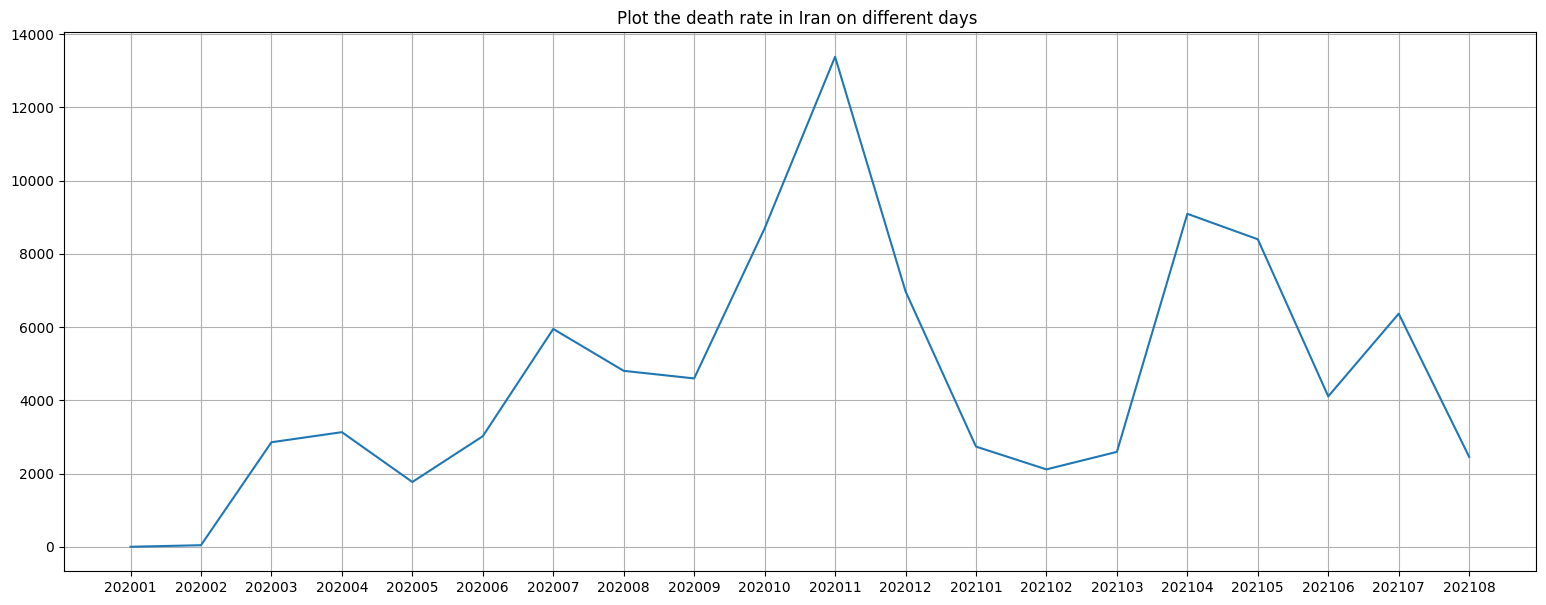

<Figure size 640x480 with 0 Axes>

In [102]:
plt.figure(figsize=(19,7))
plt.plot(data_iran['DateYearMonth'].to_numpy(dtype=(str)),data_iran['New deaths'])

plt.grid()
plt.title("Plot the death rate in Iran on different days " )
plt.show()
plt.savefig("images/covid_iran.png")